# Galerkin and Supercell methods for the Feinberg-Zee random hopping model

In [1]:
from specpol.ritz import ritz_tridiag, supercell
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
sigma_prob = 0.5
sigma = 0.9025
random.seed(1862)
def subdiag(n):
    p = random.random()
    if p < sigma_prob:
        return sigma
    return -sigma

/tmp/ipykernel_28860/3404497766.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


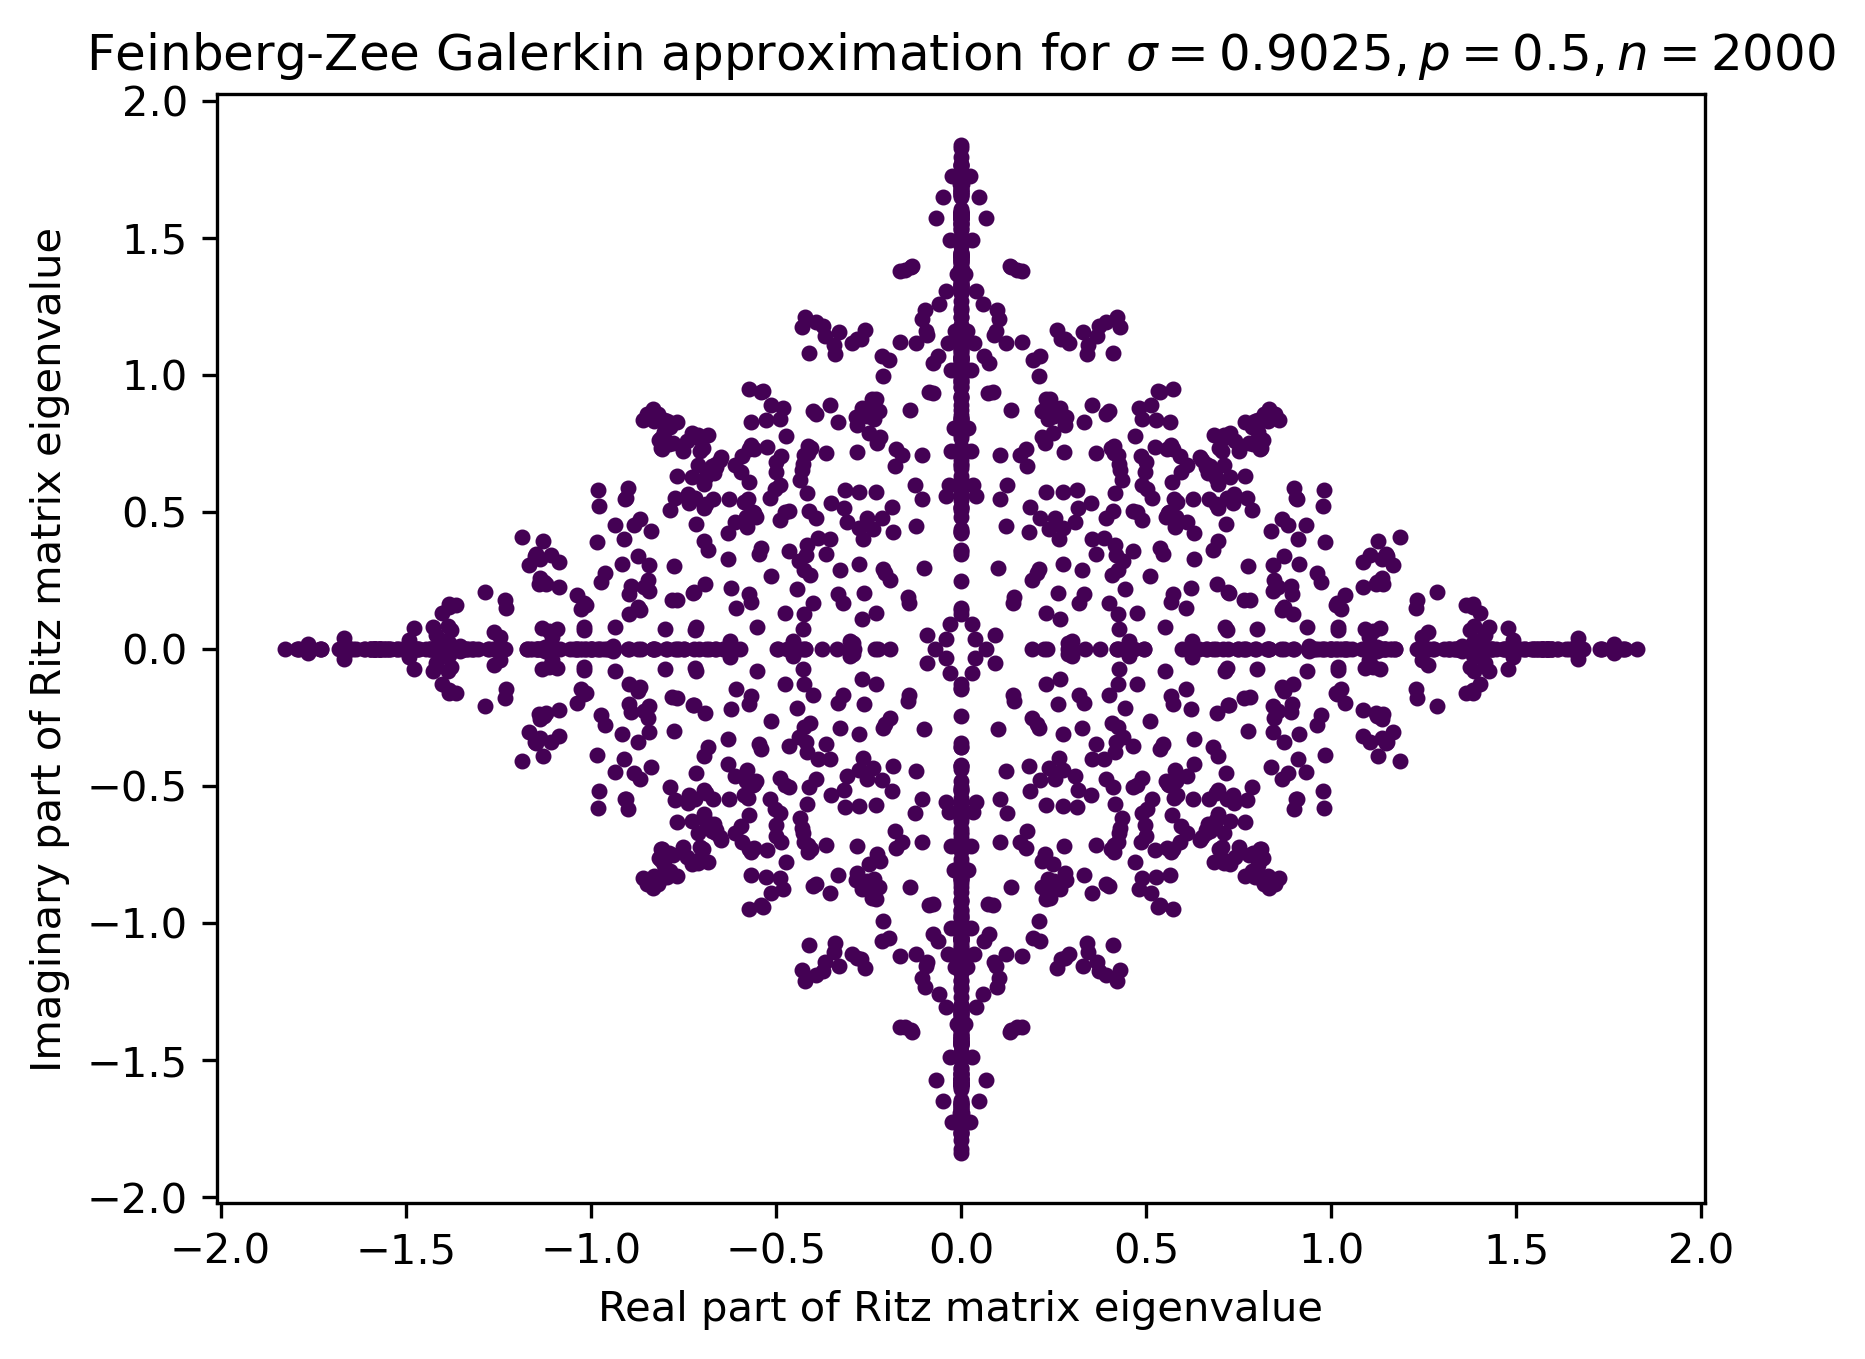

In [3]:
# regular Ritz method
spec = ritz_tridiag(subdiag, 0, 1, 2000)
fig = plt.figure(dpi=300)
ax1 = fig.add_subplot()
ax1.scatter(spec.real, spec.imag, c = "#440154" ,s = 8)
ax1.set_title(f"Feinberg-Zee Galerkin approximation for $\sigma={sigma}, p={sigma_prob}, n=2000$")
ax1.set_xlabel("Real part of Ritz matrix eigenvalue")
ax1.set_ylabel("Imaginary part of Ritz matrix eigenvalue")
fig.show()

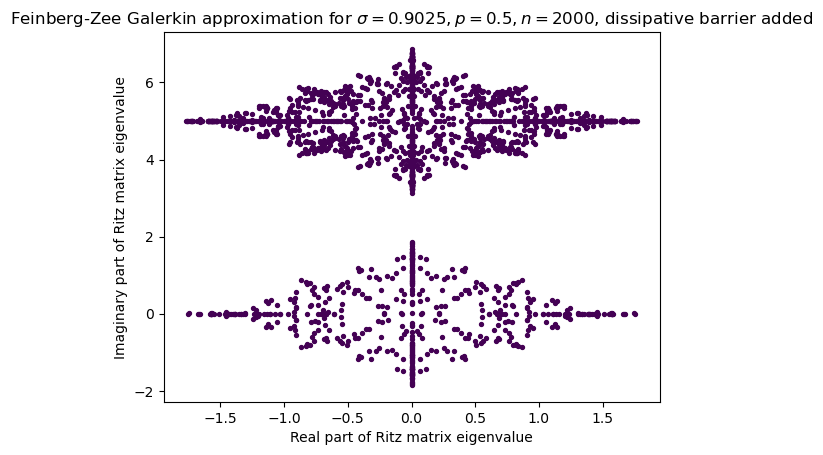

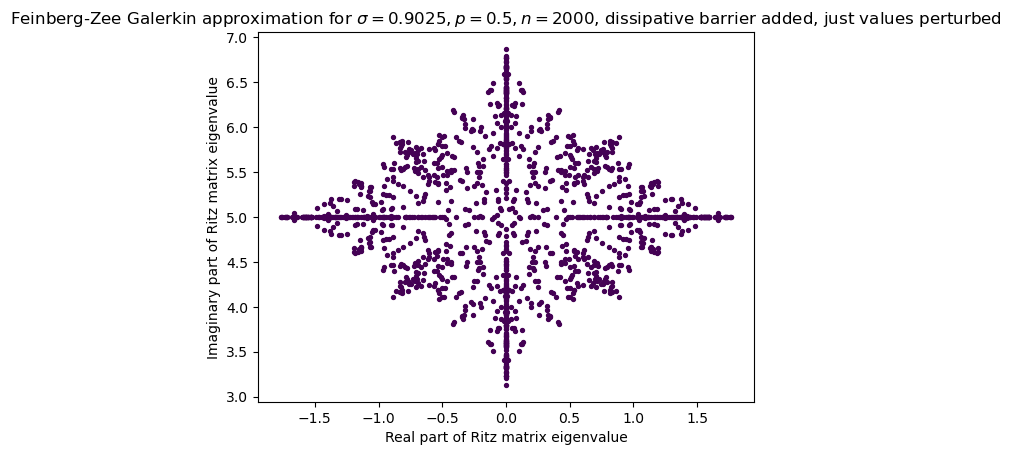

In [4]:
# Ritz with dbm
spec = ritz_tridiag(subdiag, lambda n: 5j*(abs(n)<750), 1, 2000)
plt.scatter(spec.real, spec.imag, c = "#440154" ,s = 8)
plt.title(f"Feinberg-Zee Galerkin approximation for $\sigma={sigma}, p={sigma_prob}, n=2000$, dissipative barrier added")
plt.xlabel("Real part of Ritz matrix eigenvalue")
plt.ylabel("Imaginary part of Ritz matrix eigenvalue")
plt.show()

filtered_spec = np.array([v for v in spec if v.imag > 2])
plt.scatter(filtered_spec.real, filtered_spec.imag, c = "#440154" ,s = 8)
plt.title(f"Feinberg-Zee Galerkin approximation for $\sigma={sigma}, p={sigma_prob}, n=2000$, dissipative barrier added, just values perturbed")
plt.xlabel("Real part of Ritz matrix eigenvalue")
plt.ylabel("Imaginary part of Ritz matrix eigenvalue")
plt.show()


In [4]:
spec = supercell(subdiag, 0, 1, 2000)

/home/alexhroom/.local/lib/python3.11/site-packages/specpol/ritz/discrete.py:75: ComplexWarning: Casting complex values to real discards the imaginary part
  supercell_matrix[-1][0] = 1 / alpha
/home/alexhroom/.local/lib/python3.11/site-packages/specpol/ritz/discrete.py:76: ComplexWarning: Casting complex values to real discards the imaginary part
  supercell_matrix[0][-1] = subdiag(matrix_size // 2) * alpha


/tmp/ipykernel_28860/2185524236.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


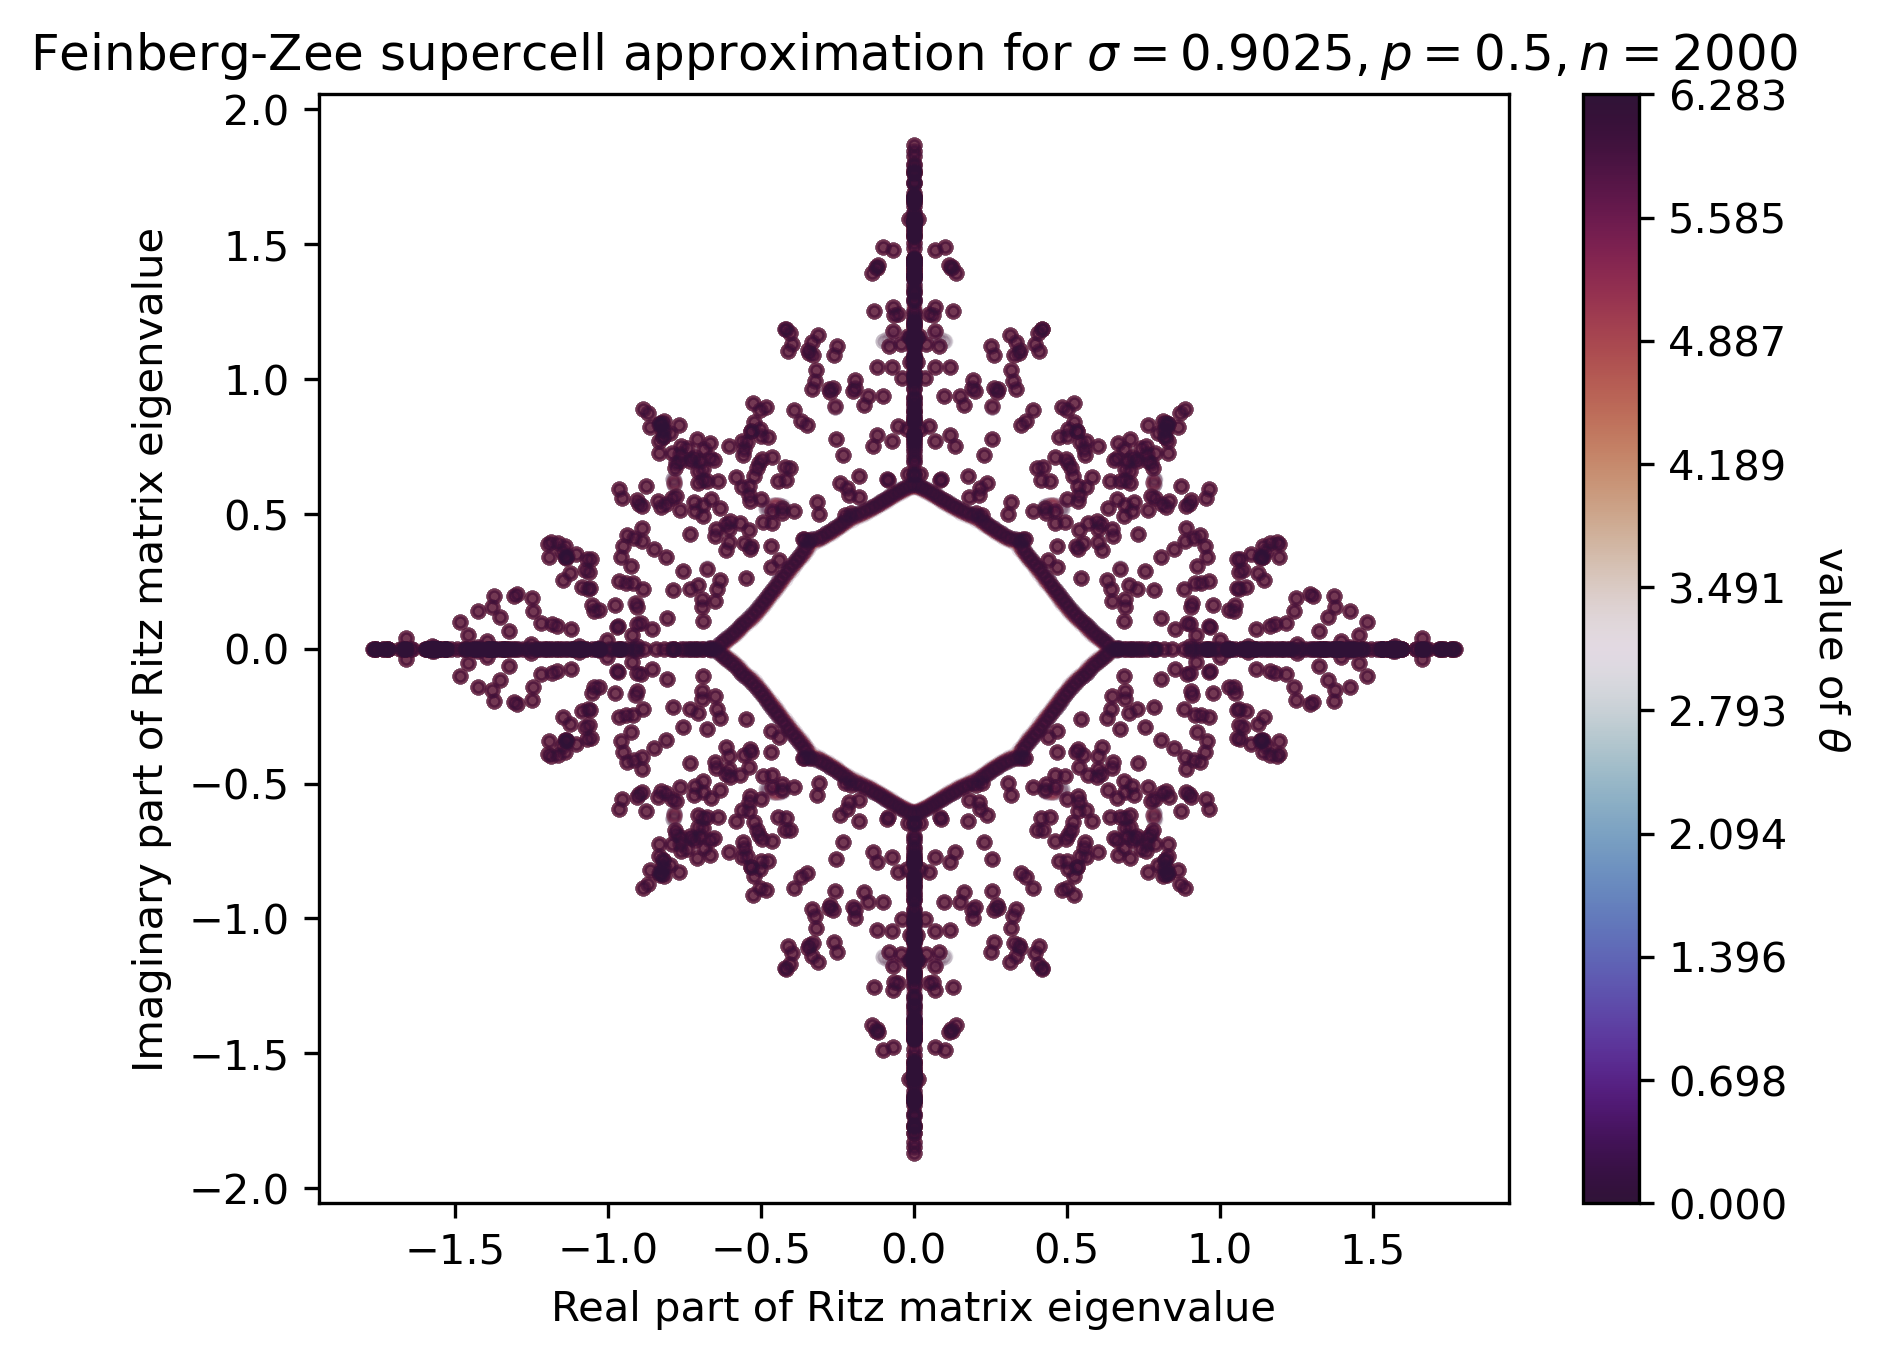

In [5]:
from matplotlib import colormaps
fig = plt.figure(dpi=300)
ax1 = fig.add_subplot()
viridis = colormaps["twilight_shifted"].resampled(len(spec))
ax1.set_prop_cycle(color=viridis.colors)
for theta_vals in spec.values():
    ax1.scatter(theta_vals.real, theta_vals.imag, s = 8, alpha=0.1)
ax1.set_title(f"Feinberg-Zee supercell approximation for $\sigma={sigma}, p={sigma_prob}, n=2000$")
ax1.set_xlabel("Real part of Ritz matrix eigenvalue")
ax1.set_ylabel("Imaginary part of Ritz matrix eigenvalue")
norm = plt.Normalize(0, 2*np.pi)
cmap = plt.get_cmap("twilight_shifted")
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cb = fig.colorbar(sm, ax=ax1, ticks=list(np.linspace(0, 2*np.pi, 10)))
cb.set_label(
    r"value of $\theta$",
    rotation=270,
    labelpad=15,
)

fig.show()

In [ ]:
spec = ritz_tridiag(subdiag, 0, 1, 2000)
fig = plt.figure(dpi=300)
ax1 = fig.add_subplot()
ax1.scatter(spec.real, spec.imag, c = "#440154" ,s = 8)
ax1.set_title(f"Feinberg-Zee Galerkin approximation for $\sigma={sigma}, p={sigma_prob}, n=2000$")
ax1.set_xlabel("Real part of Ritz matrix eigenvalue")
ax1.set_ylabel("Imaginary part of Ritz matrix eigenvalue")
fig.show()